<font face="Times New Roman" color="darkblue">

## **Reinforcement Learning Group Assignment 1: Solving a Cliff Walking Problem using SARSA vs Q-Learning.**

<font face="Time New Roman">

### **Part 1: SARSA Approach**

[[3 3 3 3 3 3 3 3 3 3 3 1]
 [0 0 0 0 0 0 0 0 0 0 3 1]
 [0 0 0 0 0 0 0 0 0 0 3 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


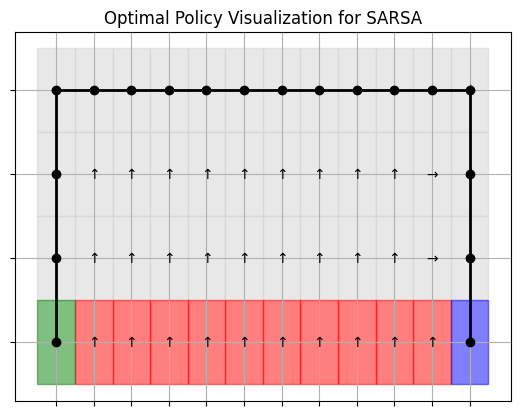

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define environment constants
WORLD_WIDTH = 12
WORLD_HEIGHT = 4
START_STATE = (3, 0)
GOAL_STATE = (3, 11)
CLIFF_STATES = [(3, i) for i in range(1, 11)]

# Define action constants
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# Define SARSA parameters
EPSILON = 0.4
ALPHA = 0.3
GAMMA = 1

# Initialize Q-values
Q = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS)))

# Define epsilon-greedy policy
def epsilon_greedy_policy(state):
    if np.random.rand() < EPSILON:
        return np.random.choice(ACTIONS)
    else:
        return np.argmax(Q[state[0], state[1]])

# SARSA algorithm
def sarsa():
    total_rewards = 0
    state = START_STATE
    action = epsilon_greedy_policy(state)
    # Iterate until the agent reaches the goal or falls off the cliff
    while state != GOAL_STATE:
        # Calculate next state based on the action taken
        next_state = (state[0] + (1 if action == ACTION_DOWN and state[0] < WORLD_HEIGHT - 1 else
                                  -1 if action == ACTION_UP and state[0] > 0 else 0),
                      state[1] + (1 if action == ACTION_RIGHT and state[1] < WORLD_WIDTH - 1 else
                                  -1 if action == ACTION_LEFT and state[1] > 0 else 0))
        # Determine next action using epsilon-greedy policy
        next_action = epsilon_greedy_policy(next_state)
        # Calculate reward based on next state
        if next_state in CLIFF_STATES:
            next_state = START_STATE  # Move back to start state if falling off the cliff
            reward = -100
        elif next_state == GOAL_STATE:
            reward = 100
        else:
            reward = -1
        # Update Q-values using SARSA update rule
        Q[state[0], state[1], action] += ALPHA * (reward + GAMMA * Q[next_state[0], next_state[1], next_action] - Q[state[0], state[1], action])
        # Move to the next state and action
        state = next_state
        action = next_action
        total_rewards += reward
    return total_rewards

# Run SARSA
total_episodes = 5000
total_rewards_list = []

for _ in range(total_episodes):
    sarsa()

# Print optimal policy
optimal_policy = np.argmax(Q, axis=2)
print(optimal_policy)

# Initialize figure and axis
fig, ax = plt.subplots()

# Define action labels for visualization
ACTION_LABELS = ['↑', '↓', '←', '→']

# Define colors for different states
COLORS = {
    0: 'lightgray',  # Normal state
    1: 'green',      # Start state
    2: 'blue',       # Goal state
    3: 'red'         # Cliff state
}

# Plot the grid world
for i in range(WORLD_HEIGHT):
    for j in range(WORLD_WIDTH):
        # Determine the color of the current state
        if (i, j) == START_STATE:
            color = COLORS[1]  # Start state
        elif (i, j) == GOAL_STATE:
            color = COLORS[2]  # Goal state
        elif (i, j) in CLIFF_STATES:
            color = COLORS[3]  # Cliff state
        else:
            color = COLORS[0]  # Normal state
        # Plot the current state
        ax.add_patch(plt.Rectangle((j, WORLD_HEIGHT - 1 - i), 1, 1, color=color, alpha=0.5))
        # Add action label in each state based on the optimal policy
        action = optimal_policy[i, j]
        ax.text(j + 0.5, WORLD_HEIGHT - 1 - i + 0.5, ACTION_LABELS[action],
                va='center', ha='center', fontsize=10)

# Plot the optimal path
path_states = [(3, 0)]  # Start from the start state
current_state = START_STATE
while current_state != GOAL_STATE:
    action = optimal_policy[current_state[0], current_state[1]]
    next_state = (current_state[0] + (1 if action == ACTION_DOWN else -1 if action == ACTION_UP else 0),
                  current_state[1] + (1 if action == ACTION_RIGHT else -1 if action == ACTION_LEFT else 0))
    path_states.append(next_state)
    current_state = next_state

# Plot the path line
path_x = [state[1] + 0.5 for state in path_states]
path_y = [WORLD_HEIGHT - 1 - state[0] + 0.5 for state in path_states]
ax.plot(path_x, path_y, color='black', linewidth=2, marker='o')

# Set labels and title
ax.set_xticks(np.arange(0.5, WORLD_WIDTH, 1))
ax.set_yticks(np.arange(0.5, WORLD_HEIGHT, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='both')
ax.set_title('Optimal Policy Visualization for SARSA')

# Show the plot
plt.show()

<font face="Time New Roman">

### **Part 2: Q-Learning Approach** 

[[1 2 3 1 3 1 1 3 1 1 1 1]
 [1 1 3 1 3 1 3 3 1 1 1 1]
 [3 3 3 3 3 3 3 3 3 3 3 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


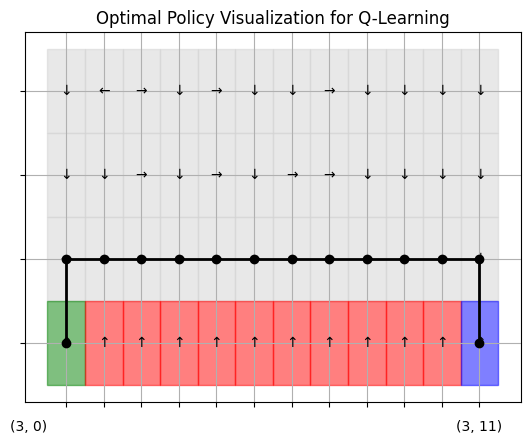

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define environment constants
WORLD_WIDTH = 12
WORLD_HEIGHT = 4
START_STATE = (3, 0)
GOAL_STATE = (3, 11)
CLIFF_STATES = [(3, i) for i in range(1, 11)]

# Define action constants
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# Define Q-learning parameters
EPSILON = 0.2
ALPHA = 0.5
GAMMA = 1

# Initialize Q-values
Q = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS)))

# Define epsilon-greedy policy
def epsilon_greedy_policy(state):
    # Choose a random action with probability epsilon, else choose the action with the highest Q-value
    if np.random.rand() < EPSILON:
        return np.random.choice(ACTIONS)
    else:
        return np.argmax(Q[state[0], state[1]])

# Q-learning algorithm
def q_learning():
    total_rewards = 0
    state = START_STATE
    # Iterate until the agent reaches the goal or falls off the cliff
    while state != GOAL_STATE:
        action = epsilon_greedy_policy(state)
        # Calculate next state based on the action taken
        next_state = (state[0] + (1 if action == ACTION_DOWN and state[0] < WORLD_HEIGHT - 1 else
                                  -1 if action == ACTION_UP and state[0] > 0 else 0),
                      state[1] + (1 if action == ACTION_RIGHT and state[1] < WORLD_WIDTH - 1 else
                                  -1 if action == ACTION_LEFT and state[1] > 0 else 0))
        # Determine the reward for the next state
        if next_state in CLIFF_STATES:
            # Move back to the start state if falling off the cliff
            next_state = START_STATE
            reward = -100
        elif next_state == GOAL_STATE:
            # Reward for reaching the goal state
            reward = 100
        else:
            reward = -1
        # Choose the best action for the next state
        if np.sum(Q[next_state[0], next_state[1]]) == 0:
            best_next_action = np.random.choice(ACTIONS)
        else:
            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
        # Update Q-values using Q-learning update rule
        Q[state[0], state[1], action] += ALPHA * (reward + GAMMA * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], action])
        state = next_state
        total_rewards += reward
    return total_rewards

# Run Q-learning
total_episodes = 5000
for _ in range(total_episodes):
    q_learning()

# Print optimal policy
optimal_policy = np.argmax(Q, axis=2)
print(optimal_policy)

# Initialize figure and axis
fig, ax = plt.subplots()

# Define action labels for visualization
ACTION_LABELS = ['↑', '↓', '←', '→']

# Define colors for different states
COLORS = {
    0: 'lightgray',  # Normal state
    1: 'green',      # Start state
    2: 'blue',       # Goal state
    3: 'red'         # Cliff state
}

# Plot the grid world
for i in range(WORLD_HEIGHT):
    for j in range(WORLD_WIDTH):
        # Determine the color of the current state
        if (i, j) == START_STATE:
            color = COLORS[1]  # Start state
        elif (i, j) == GOAL_STATE:
            color = COLORS[2]  # Goal state
        elif (i, j) in CLIFF_STATES:
            color = COLORS[3]  # Cliff state
        else:
            color = COLORS[0]  # Normal state
        # Plot the current state
        ax.add_patch(plt.Rectangle((j, WORLD_HEIGHT - 1 - i), 1, 1, color=color, alpha=0.5))
        # Add action label in each state based on the optimal policy
        action = optimal_policy[i, j]
        ax.text(j + 0.5, WORLD_HEIGHT - 1 - i + 0.5, ACTION_LABELS[action],
                va='center', ha='center', fontsize=10)

# Plot the optimal path
path_states = [(3, 0)]  # Start from the start state
current_state = START_STATE
while current_state != GOAL_STATE:
    action = optimal_policy[current_state[0], current_state[1]]
    next_state = (current_state[0] + (1 if action == ACTION_DOWN else -1 if action == ACTION_UP else 0),
                  current_state[1] + (1 if action == ACTION_RIGHT else -1 if action == ACTION_LEFT else 0))
    path_states.append(next_state)
    current_state = next_state

# Plot the path line
path_x = [state[1] + 0.5 for state in path_states]
path_y = [WORLD_HEIGHT - 1 - state[0] + 0.5 for state in path_states]
ax.plot(path_x, path_y, color='black', linewidth=2, marker='o')

# Set labels and title
ax.set_xticks(np.arange(0.5, WORLD_WIDTH, 1))
ax.set_yticks(np.arange(0.5, WORLD_HEIGHT, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='both')
ax.set_title('Optimal Policy Visualization for Q-Learning')

# Add labels for the start and goal states
ax.text(-0.5, -0.5, '(3, 0)', va='center', ha='center', fontsize=10)
ax.text(11.5, -0.5, '(3, 11)', va='center', ha='center', fontsize=10)

# Show the plot
plt.show()

<font face="Time New Roman">

### **Part 3: Convergence comparision between SARSA and Q-Learning.**

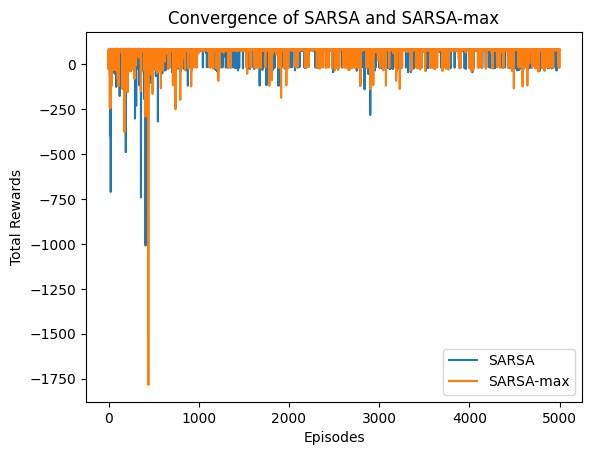

In [ ]:
import matplotlib.pyplot as plt

# Run SARSA and SARSA-max algorithms and collect total rewards for each episode
total_rewards_sarsa = []
total_rewards_sarsa_max = []

for _ in range(5000):
    rewards_sarsa = sarsa()  # Run SARSA for one episode and get total rewards
    rewards_sarsa_max = q_learning()  # Run SARSA-max for one episode and get total rewards
    total_rewards_sarsa.append(rewards_sarsa)
    total_rewards_sarsa_max.append(rewards_sarsa_max)

# Plot convergence graph (Total Rewards vs. Episodes)
plt.plot(total_rewards_sarsa, label='SARSA')
plt.plot(total_rewards_sarsa_max, label='SARSA-max')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Convergence of SARSA and SARSA-max')
plt.legend()
plt.show()
